# Báo cáo giữa kỳ
Dùng keras để xây dựng mô hình deep learning để nhận dạng cat, dog và horse.<br>
Ảnh ví dụ để test mô hình, kích thước của ảnh test sẽ được scale về <strong>224x224</strong>:<br>
<img src="example.jpeg" alt="" style="width:224px; heoght:224px"/><br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/drive/MyDrive/Hoc_Sau/Giua_ky/Dataset"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Chia 20% dữ liệu làm validation

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7325 images belonging to 3 classes.
Found 1829 images belonging to 3 classes.


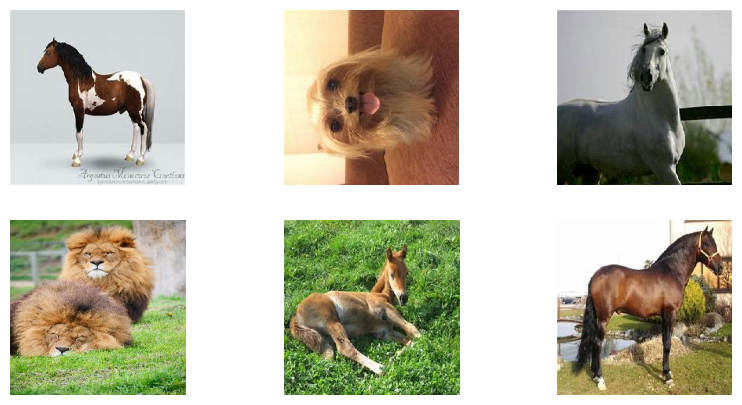

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy một batch ảnh
images, labels = next(train_generator)

# Hiển thị một số ảnh mẫu
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Đóng băng mô hình gốc

# Thêm Fully Connected Layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(3, activation="softmax")(x)  # 3 class: cat, dog, horse

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(train_generator, epochs=5, validation_data=val_generator)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 4260s 19s/step - accuracy: 0.7830 - loss: 0.5328 - val_accuracy: 0.9661 - val_loss: 0.1218
Epoch 2/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 48s 210ms/step - accuracy: 0.9611 - loss: 0.1227 - val_accuracy: 0.9661 - val_loss: 0.1071
Epoch 3/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 46s 200ms/step - accuracy: 0.9614 - loss: 0.1073 - val_accuracy: 0.9672 - val_loss: 0.1009
Epoch 4/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 48s 208ms/step - accuracy: 0.9677 - loss: 0.0882 - val_accuracy: 0.9688 - val_loss: 0.1004
Epoch 5/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 45s 195ms/step - accuracy: 0.9757 - loss: 0.0684 - val_accuracy: 0.9656 - val_loss: 0.1081


In [ ]:
base_model.trainable = True  # Mở lại các tầng MobileNetV2
model.compile(optimizer=Adam(learning_rate=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])
history_finetune = model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 119s 322ms/step - accuracy: 0.9261 - loss: 0.1986 - val_accuracy: 0.9650 - val_loss: 0.1280
Epoch 2/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 49s 212ms/step - accuracy: 0.9573 - loss: 0.1142 - val_accuracy: 0.9623 - val_loss: 0.1311
Epoch 3/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 49s 213ms/step - accuracy: 0.9688 - loss: 0.0937 - val_accuracy: 0.9634 - val_loss: 0.1161
Epoch 4/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 50s 216ms/step - accuracy: 0.9792 - loss: 0.0593 - val_accuracy: 0.9650 - val_loss: 0.1147
Epoch 5/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 50s 216ms/step - accuracy: 0.9840 - loss: 0.0473 - val_accuracy: 0.9666 - val_loss: 0.1127


In [ ]:
model.save("/content/drive/MyDrive/Hoc_Sau/Giua_ky/mobilenetv2_model.h5")

In [ ]:

print("Validation accuracy (initial training):", history.history['val_accuracy'][-1])

# Print val_accuracy from the fine-tuning phase
print("Validation accuracy (fine-tuning):", history_finetune.history['val_accuracy'][-1])


Validation accuracy (initial training): 0.96555495262146
Validation accuracy (fine-tuning): 0.9666484594345093


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/Hoc_Sau/Giua_ky/mobilenetv2_model.h5")

In [ ]:
# prompt: Dùng mô hình để test thử ảnh

from tensorflow.keras.preprocessing import image
import numpy as np

def test_image(image_path):
  img = image.load_img(image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)

  class_labels = {0: 'Cat', 1: 'Dog', 2: 'Horse'}

  print("Predicted class:", class_labels[predicted_class])
  print("Prediction probabilities:", prediction)

# Thay đổi đường dẫn đến ảnh test
test_image_path = '/content/drive/MyDrive/Hoc_Sau/Giua_ky/Test.jpeg'
test_image(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class: Cat
Prediction probabilities: [[9.6230233e-01 3.7177622e-02 5.2003685e-04]]
